**Basic Business Understanding problems from this dataset are follows,**

1) How much Job Satisfaction could be affected based on Job role? 

2) How Age plays an major role on DailyRate of the employee?

3) How Monthly income was changing with respect to Education of the Employee?

4) Finally I did a small prediction on `Monthly rate` based on following features, 
   Education, Education field, Gender, age, No of companies worked, PercentSalaryHike, YearsInCurrentRole etc...
   using ML techniques( i gave a small try) 

Here below steps followed as per conditions in rubrics

**1) Import all necessary libraries. **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
%matplotlib inline


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE



**2) Read the dataset.**

In [2]:
#importing and read the files.

df = pd.read_csv('./HR1.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80.0,0,8,0.0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80.0,1,10,3.0,3,10,7,1,7
2,37,Yes,NaN,1373,Research & Development,2,2,Other,1,4,...,2,80.0,0,7,3.0,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80.0,0,8,3.0,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80.0,1,6,3.0,3,2,2,2,2


In [3]:
#Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1427 non-null object
DailyRate                   1470 non-null int64
Department                  1410 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1434 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1370 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1307 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

**3)Data preparation**

In [4]:
#detailed description about the dataset 

df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1469.0,1470.000000,1470.000000,1466.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.797408,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289186,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Working with Missing values**

In [5]:
#Check the columns that contains any missing values
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel               True
DailyRate                   False
Department                   True
DistanceFromHome            False
Education                   False
EducationField               True
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                       True
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                      True
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome                True
MonthlyRate                  True
NumCompaniesWorked           True
Over18                      False
OverTime                    False
PercentSalaryHike            True
PerformanceRating            True
RelationshipSatisfaction    False
StandardHours                True
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

**Inserting and removing rows and columns**

In [6]:
#inserting new rows

front=df['Attrition']
df.drop(labels=['Attrition'],axis=1,inplace=True)
df.insert(0,'Attrition',front)
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80.0,0,8,0.0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80.0,1,10,3.0,3,10,7,1,7
2,Yes,37,NaN,1373,Research & Development,2,2,Other,1,4,...,2,80.0,0,7,3.0,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80.0,0,8,3.0,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80.0,1,6,3.0,3,2,2,2,2


**Dropping Unwanted rows and Columns**

In [7]:
#drop the columns that are useless in whole progress

df.drop(labels=['EmployeeCount','EmployeeNumber','StockOptionLevel','StandardHours'],axis=1,inplace=True)
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11.0,3.0,1,8,0.0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23.0,4.0,4,10,3.0,3,10,7,1,7
2,Yes,37,NaN,1373,Research & Development,2,2,Other,4,Male,...,15.0,3.0,2,7,3.0,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11.0,3.0,3,8,3.0,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12.0,3.0,4,6,3.0,3,2,2,2,2


In [8]:
#drop the columns that contains Missing values
df1 = df.dropna(axis=0, how="any") 
df1.isnull().any()


Attrition                   False
Age                         False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLast

In [9]:
#Check the head values afer removing the columns with missing values.
df1.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11.0,3.0,1,8,0.0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23.0,4.0,4,10,3.0,3,10,7,1,7
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12.0,3.0,4,6,3.0,3,2,2,2,2
5,No,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,13.0,3.0,3,8,2.0,2,7,7,3,6
6,No,59,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,20.0,4.0,1,12,3.0,2,1,0,0,0


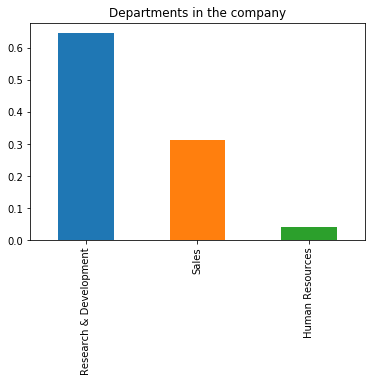

In [10]:
Departments = df1.Department.value_counts()

(Departments/df1.shape[0]).plot(kind="bar");
plt.title("Departments in the company");

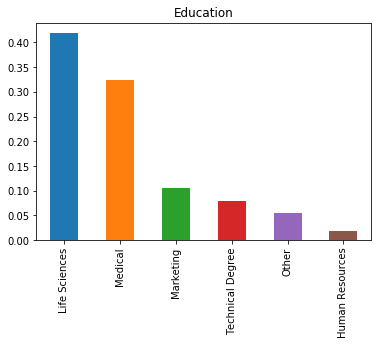

In [11]:
Education_fields = df1.EducationField.value_counts()#Provide a pandas series of the counts for each FormalEducation status

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(Education_fields/df1.shape[0]).plot(kind="bar");
plt.title("Education");

In [12]:
#groupby the importent columns such as gender, education field and monthly income

pd.DataFrame(df1.query("Department == 'Research & Development' and (Gender == 'Male' or Gender == 'Female')").groupby(['Gender', 'EducationField']).mean()['MonthlyIncome'])

MonthlyIncome
Gender EducationField                 
Female Life Sciences       5919.687500
       Medical             6348.779221
       Other               6206.900000
       Technical Degree    7447.214286
Male   Life Sciences       6092.666667
       Medical             6325.678571
       Other               6935.812500
       Technical Degree    4053.315789

**1) How much Job Satisfaction could be affected based on Job role?**

In [37]:
#How much Job Satisfaction could be affected based on Job role?

df1.groupby(['JobRole']).mean()['JobSatisfaction'].sort_values()

JobRole
Human Resources              2.454545
Sales Representative         2.558824
Manufacturing Director       2.593750
Manager                      2.600000
Sales Executive              2.691275
Laboratory Technician        2.697248
Research Scientist           2.769841
Research Director            2.848485
Healthcare Representative    2.886792
Name: JobSatisfaction, dtype: float64

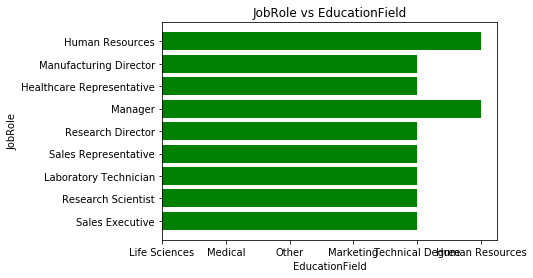

In [38]:
def job_EduF():
    # this is for plotting purpose
    JobR = df1.JobRole
    EducationF = df1.EducationField
    plt.barh(JobR,EducationF, color = "Green")
    plt.ylabel('JobRole', fontsize=10)
    plt.xlabel('EducationField', fontsize=10)
    #plt.xticks(EducationF, MonthlyI, fontsize=12, rotation=45)
    plt.title('JobRole vs EducationField')
    plt.show()
    
job_EduF()
    

**2) How Age plays an major role on DailyRate of the employee?**

In [24]:
#How Age plays an major role on DailyRate of the employee?

df1.groupby(['Age']).mean()['DailyRate'].sort_values()

Age
57     307.500000
18     415.500000
19     560.000000
54     665.555556
31     673.870968
42     689.666667
55     695.000000
58     696.333333
41     703.333333
37     725.000000
20     734.285714
39     746.904762
33     749.421053
21     751.375000
23     760.000000
25     771.000000
50     773.466667
27     787.000000
38     797.043478
34     797.617647
43     816.125000
26     816.416667
29     817.193548
32     819.794118
24     820.111111
40     832.185185
52     848.250000
46     860.000000
30     873.428571
36     879.885714
59     895.166667
45     896.333333
28     898.392857
49     931.090909
44     931.636364
35     944.000000
22     953.000000
47     954.111111
53     960.461538
48     970.666667
51     991.125000
56    1026.800000
60    1097.500000
Name: DailyRate, dtype: float64

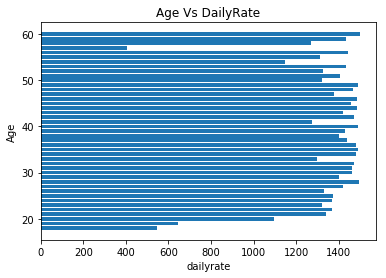

In [25]:
def Age_daily_rate():
    # this is for plotting purpose
    Agee = df1.Age
    dailyrate = df1.DailyRate
    plt.barh(Agee, dailyrate)
    plt.ylabel('Age', fontsize=10)
    plt.xlabel('dailyrate', fontsize=10)
   # plt.xticks(EducationF, MonthlyI, fontsize=12, rotation=45)
    plt.title('Age Vs DailyRate')
    plt.show()
    
Age_daily_rate()

**3) How Monthly income was changing with respect to Education of the Employee?**

In [26]:
#How Monthly income was changing with respect to Education of the Employee?
df1.groupby(['EducationField']).mean()['MonthlyIncome']

EducationField
Human Resources     6599.666667
Life Sciences       6211.057252
Marketing           7371.469697
Medical             6341.811881
Other               6375.558824
Technical Degree    5560.326531
Name: MonthlyIncome, dtype: float64

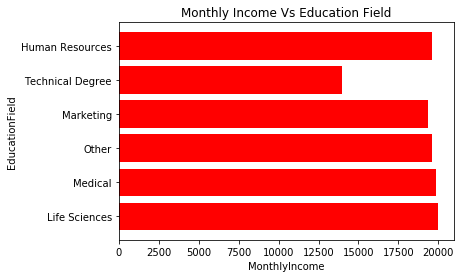

In [27]:
def eduF_monI():
    # this is for plotting purpose
    EducationF = df1.EducationField
    MonthlyI = df1.MonthlyIncome
    plt.barh(EducationF, MonthlyI, color = "Red")
   # plt.barh()
    plt.ylabel('EducationField', fontsize=10)
    plt.xlabel('MonthlyIncome', fontsize=10)
    #plt.xticks(EducationF, MonthlyI, fontsize=12, rotation=45)
    plt.title('Monthly Income Vs Education Field')
    plt.show()
    
eduF_monI()
    

**Heat map seaborn for Correlation between the dataframes**

In [28]:
def get_heatmap(df):
    '''
    FUNCTION:
    plots a seaborn heatmap based on the correlation
    
    INPUT:
    df - the pandas dataframe you want to present
    
    OUTPUT:
    matplotlib Axes
    '''
    return sns.heatmap(df)

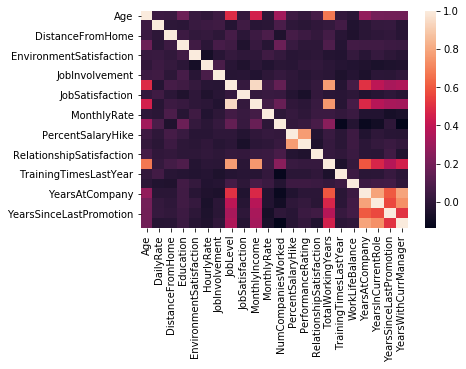

In [29]:
get_heatmap(df1.corr())

**4) Finally I did a small prediction on `Monthly rate` based on followinf features, 
   Education, Education field, Gender, age, No of companies worked, PercentSalaryHike, YearsInCurrentRole etc...
   using ML techniques.**

In [21]:
#columns before implement Algorithms
df1.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

** Implemntation of ML algorithms without LabelEncoders and also without categorical values **

In [22]:

#Split into explanatory and response variables
X = df1[["Age",'Education','NumCompaniesWorked','PercentSalaryHike','YearsInCurrentRole']]
y = df1['MonthlyRate']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 


#print(train_score)
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was -0.05140685869533401 on 188 values.'

In [23]:
df1.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**Implement the Support Vector Classifier algorithm along with the LabelEncoders for the datafrmae that contains categorical values**

In [24]:
from sklearn.preprocessing import LabelEncoder
dff = pd.read_csv('./HR.csv')



dff['Gen'] = LabelEncoder().fit_transform(dff['Gender'])
dff['EduF'] = LabelEncoder().fit_transform(dff['EducationField'])
dff['Depart'] = LabelEncoder().fit_transform(dff['Department'])
#print(df[['Gen','EduF','Depart']])

#Only use quant variables and drop any rows with missing values
num_vars = dff[["Age",'Gen','EduF','Depart','Education','NumCompaniesWorked','PercentSalaryHike','YearsInCurrentRole','MonthlyRate']]
#Drop the rows with missing salaries
#drop_sal_df = num_vars.dropna(subset=['MonthlyRate'], axis=0)

# Mean function
#fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
#fill_df = drop_sal_df.apply(fill_mean, axis=0)

#Split into explanatory and response variables
X = dff[["Age",'Gen','EduF','Depart','Education','NumCompaniesWorked','PercentSalaryHike','YearsInCurrentRole']]
y = dff['MonthlyRate']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = SVC() # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score and accuracy_score for the model using only quantitative variables was {} and {} on {} values.".format(r2_score(y_test, y_test_preds),accuracy_score(y_test, y_test_preds), len(y_test))
#"The accuracy score for the model using only quantitative variables was {} on {} values.".format(accuracy_score(y_test, y_test_preds), len(y_test))

'The r-squared score and accuracy_score for the model using only quantitative variables was -0.9084415882233425 and 0.0022675736961451248 on 441 values.'

** Testing/ Checking cells for the above processess**

In [25]:
df["Gender"].head()

0    Female
1      Male
2      Male
3    Female
4      Male
Name: Gender, dtype: object

In [26]:
df = pd.read_csv('./HR.csv')
#dff['Male'] = dff['Gender'].map( {'Male':1, 'Female':0} )
#dff[['Gender', 'Male']]

from sklearn.preprocessing import LabelEncoder
df['EduF'] = LabelEncoder().fit_transform(df['EducationField'])
df[['EducationField', 'EduF']]

,EducationField,EduF
0,Life Sciences,1
1,Life Sciences,1
2,Other,4
3,Life Sciences,1
4,Medical,3
5,Life Sciences,1
6,Medical,3
7,Life Sciences,1
8,Life Sciences,1
9,Medical,3
